In [8]:
file_pairs = open("ct-cliques_2_text.txt")
file_wc = open("ct-wc-data.txt", "a")
for line in file_pairs:
    comps = line.split("|")
    ndx1 = comps[0].index("_")
    ndx2 = comps[1].index("_")  
#     ndx3 = comps[2].index("_")      
    file_wc.write(comps[0][ndx1+1:] + " " + comps[1][ndx2+1:])
    file_wc.write("\n")
    
file_wc.close()
    
    
    
    

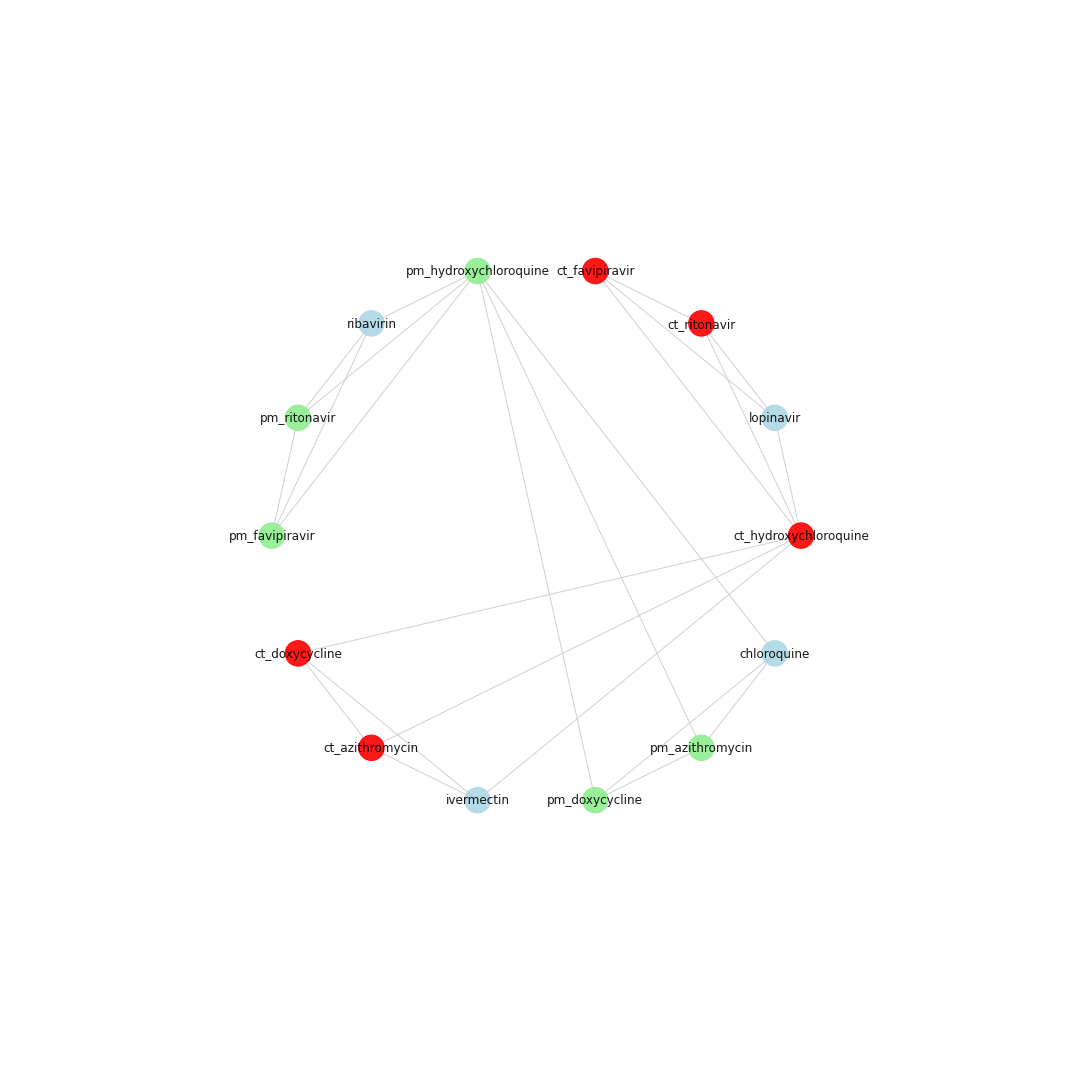

In [201]:
import networkx as nx
from matplotlib.pyplot import *

g = nx.Graph()
pos=nx.spring_layout(g)


# Clinical trial & hydroxychloroquine, azithromycin, doxycycline,ivermectin\\
# PubMed & hydroxychloroquine, chloroquine, azithromycin,doxycycline\\   

# ct_hydroxychloroquine,ct_lopinavir,ct_ritonavir,ct_favipiravir 
# pm_hydroxychloroquine, pm_ribavirin,pm_ritonavir,pm_favipiravir


labels  = [
    
    
    ('ct_hydroxychloroquine','lopinavir'),
    ('ct_hydroxychloroquine','ct_ritonavir'),    
    ('ct_hydroxychloroquine','ct_favipiravir'),  
    ('lopinavir', 'ct_ritonavir'),
    ('lopinavir', 'ct_favipiravir'),
    ('ct_ritonavir', 'ct_favipiravir'),
    
    ('pm_hydroxychloroquine','ribavirin'),
    ('pm_hydroxychloroquine','pm_ritonavir'),    
    ('pm_hydroxychloroquine','pm_favipiravir'),  
    ('ribavirin', 'pm_ritonavir'),
    ('ribavirin', 'pm_favipiravir'),
    ('pm_ritonavir', 'pm_favipiravir'), 
    
    ("ct_hydroxychloroquine", "ct_doxycycline"),
    ("ct_hydroxychloroquine", "ct_azithromycin"),
    ("ct_hydroxychloroquine", "ivermectin"),    
    ("ct_doxycycline", "ct_azithromycin"),
    ("ct_doxycycline","ivermectin"),  
    ("ct_azithromycin", "ivermectin"),   
    

    ("pm_hydroxychloroquine", "pm_doxycycline"),
    ("pm_hydroxychloroquine", "pm_azithromycin"),
    ("pm_hydroxychloroquine", "chloroquine"),    
    ("pm_doxycycline", "pm_azithromycin"),
    ("pm_doxycycline","chloroquine"),  
    ("pm_azithromycin", "chloroquine") ]  
                
g.add_edges_from (labels)

color_map = []
for node in g.nodes:
    if node.startswith('ct'):
        color_map.append('red')
    elif node.startswith('pm'):
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
        

# nx.draw_networkx(g, node_color=color_map, with_labels=True)
# plt.show()


plt.figure(figsize=(15,15))
pos = nx.circular_layout(g)
# pos = nx.kamada_kawai_layout(g)

# pos = nx.spring_layout(g, k=5/math.sqrt(g.order()))

nx.draw_networkx(g, pos, alpha=.9, node_color=color_map, node_size=650, font_size=12,  edge_color='0.8', with_labels = True)
plt.axis('off')
plt.margins(.5)
plt.tight_layout();
plt.savefig("matching-cliques-fs-12.png", format="PNG", bbox_inches="tight")



import igraph
g = igraph.Graph.Barabasi(n = 8, m = 2)

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

p = igraph.plot(g,
                vertex_label = labels,
                vertex_size = 32,
                vertex_frame_width = 0.0,
                vertex_color = '#AAAAFF')

p.save('plot1.png')

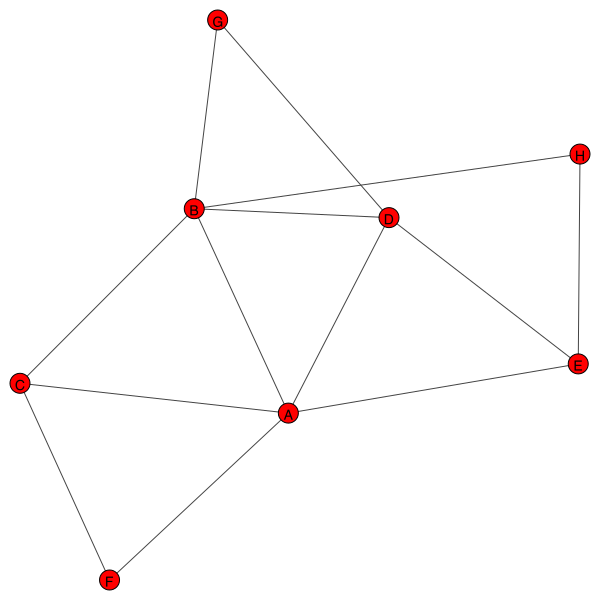

In [36]:
g.vs['label'] = labels
igraph.plot(g)